**World Population Analysis (1970 to 2022)**

**Source of the dataset:** Kaggle

**Link of the data:** https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset


**Description:** This project tries to apply the knowledge of the basic tech stack such as numpy, pandas, seaborn, to analyse the world population data and obtain insights from it.
Several insights could be drawn from the data, which have been plotted as graphs for the ease of understanding.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('world_population.csv')

#Identify the population columns (e.g., '2022 Population', '2010 Population', etc.)
pop_columns = [col for col in df.columns if 'Population' in col and 'World' not in col]

#Sort years in descending order (2022, 2020, 2015, etc.)
pop_columns.sort(reverse=True)

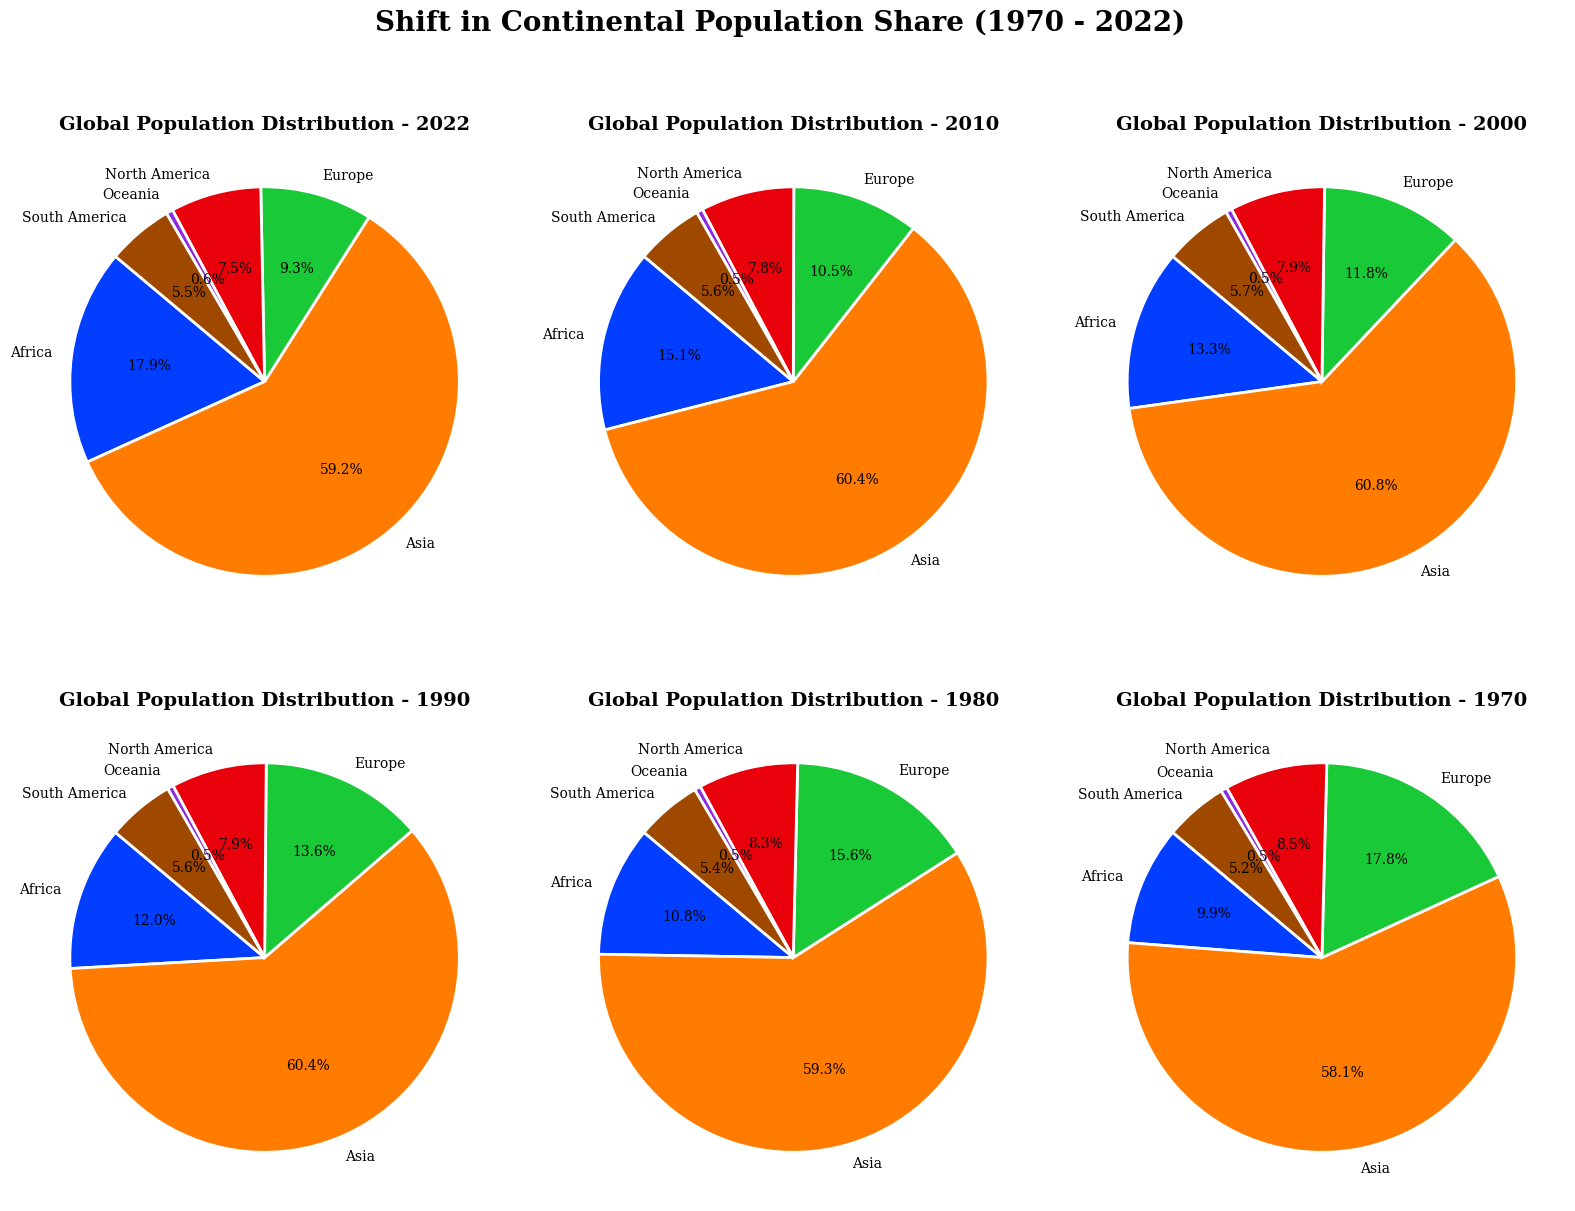

<Figure size 640x480 with 0 Axes>

In [12]:
#Choose specific years to visualize (to avoid overcrowding with too many charts)
years_to_plot = ['2022 Population', '2010 Population', '2000 Population', '1990 Population','1980 Population','1970 Population']

#Set up the plotting grid (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axes = axes.flatten() # Flatten 2D array to 1D for easy iteration
colors = sns.color_palette('bright')

for i, col in enumerate(years_to_plot):
    # Group by Continent and sum the population for that specific year
    continent_dist = df.groupby('Continent')[col].sum()

    # Create the pie chart
    axes[i].pie(
        continent_dist,
        labels=continent_dist.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )

    # Extract year from column name for the title
    year_label = col.split()[0]
    axes[i].set_title(f'Global Population Distribution - {year_label}', fontsize=14, fontweight='bold')

#Final adjustments
plt.tight_layout()
plt.suptitle('Shift in Continental Population Share (1970 - 2022)', fontsize=20, y=1.05, fontweight='bold')
plt.show()

#Save the graph
plt.savefig('Shift in Continental Population Share (1970 - 2022).png', dpi=300, bbox_inches='tight')

/tmp/ipython-input-1401497597.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1401497597.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1401497597.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1401497597.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1401497597.py:18: FutureWarning: 

Passin

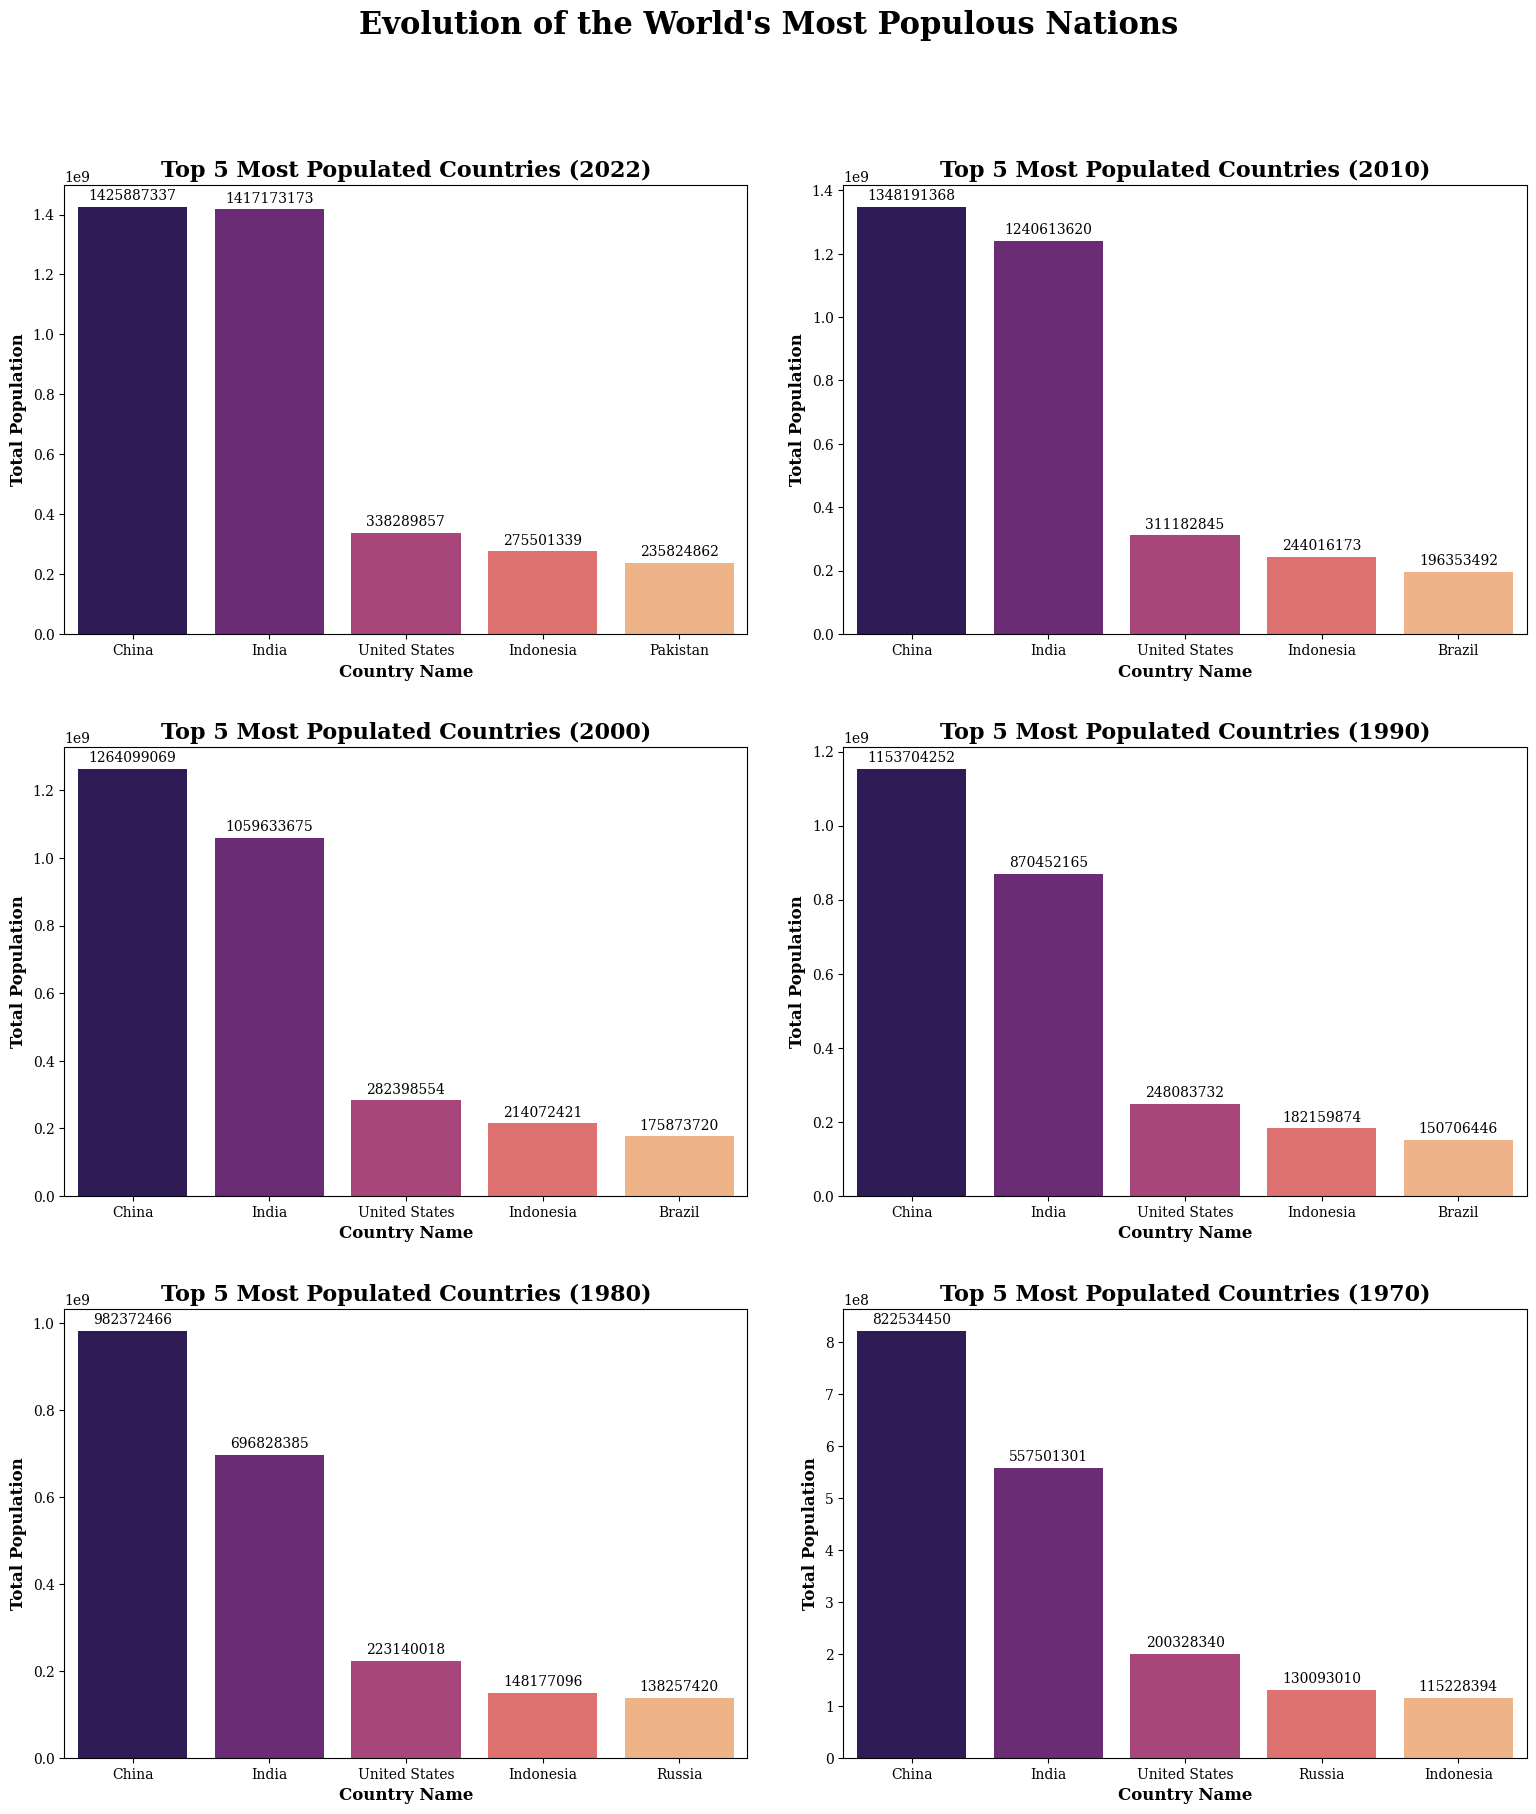

<Figure size 640x480 with 0 Axes>

In [13]:
#Define the years we want to analyze
years = [2022, 2010, 2000, 1990, 1980, 1970]

#Create a subplot grid (3 rows, 2 columns)
# We use 'serif' to approximate the "Times New Roman" look requested
plt.rcParams["font.family"] = "serif"
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

#Loop through each year and plot
for i, year in enumerate(years):
    column_name = f"{year} Population"

    # Get the top 5 countries for the specific year
    top_5 = df.nlargest(5, column_name)

    # Create the Bar Plot
    sns.barplot(
        ax=axes[i],
        x='Country/Territory',
        y=column_name,
        data=top_5,
        palette='magma'
    )

    # Styling each subplot
    axes[i].set_title(f'Top 5 Most Populated Countries ({year})', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Country Name', fontsize=12, fontweight="bold")
    axes[i].set_ylabel('Total Population', fontsize=12, fontweight="bold")

    # Add values on top of the bars for clarity
    for container in axes[i].containers:
        axes[i].bar_label(container, padding=3, fmt='%.0f', fontsize=10)

#Global Layout Adjustments
plt.suptitle('Evolution of the World\'s Most Populous Nations', fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

#Save the graph
plt.savefig('Evolution of the World\'s Most Populous Nations.png', dpi=300, bbox_inches='tight')

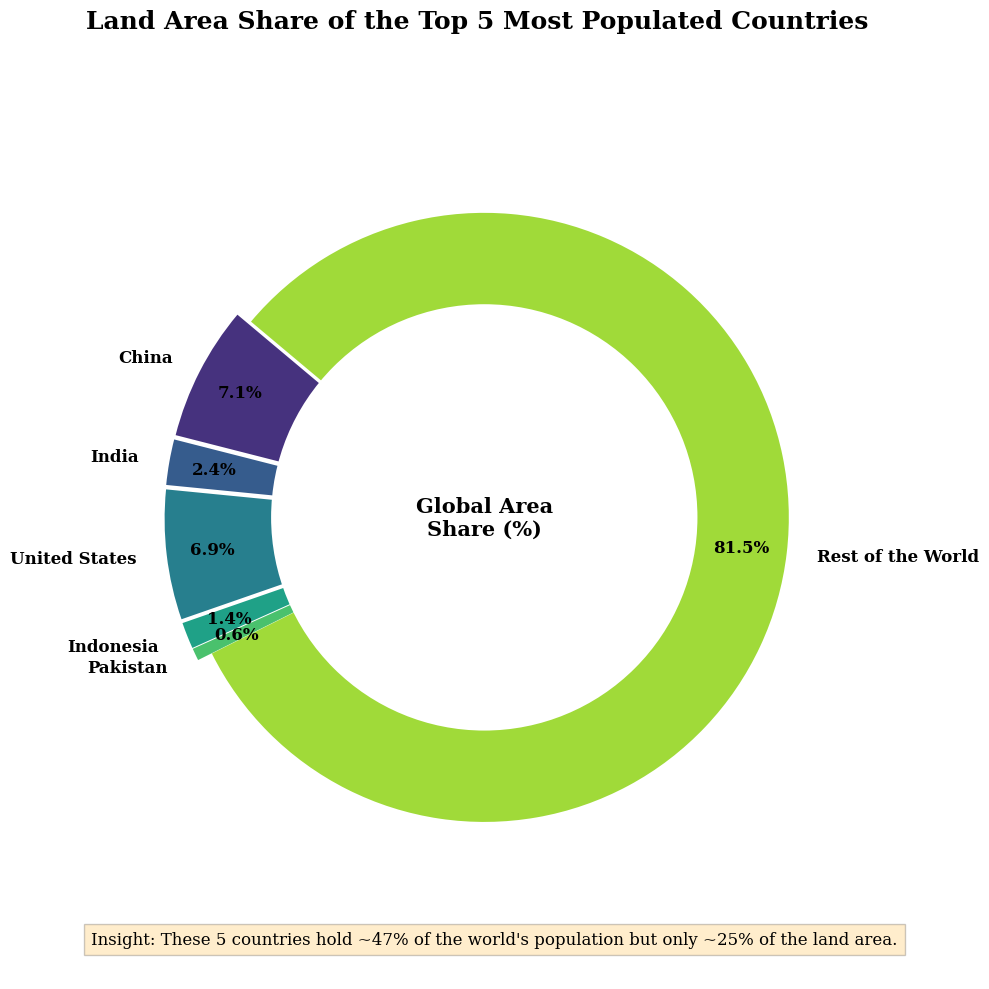

<Figure size 640x480 with 0 Axes>

In [14]:
#Identify the Top 5 most populated countries (as of 2022)
top_5_pop = df.nlargest(5, '2022 Population')

#Calculate Area Shares
# Calculate the total area of all countries in the dataset
total_world_area = df['Area (km²)'].sum()

# Get areas for the top 5
top_5_areas = top_5_pop[['Country/Territory', 'Area (km²)']].copy()
top_5_areas['Area Share (%)'] = (top_5_areas['Area (km²)'] / total_world_area) * 100

# Calculate the area share of the "Rest of the World"
others_area = total_world_area - top_5_areas['Area (km²)'].sum()
others_share = (others_area / total_world_area) * 100

#Prepare data for the Donut Chart
labels = top_5_areas['Country/Territory'].tolist() + ['Rest of the World']
sizes = top_5_areas['Area Share (%)'].tolist() + [others_share]
colors = sns.color_palette('viridis', n_colors=len(labels))

#Plotting the "Best Possible Illustration" (Donut Chart)
plt.rcParams["font.family"] = "serif"
fig, ax = plt.subplots(figsize=(10, 10))

# Create the Pie chart first
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.85,
    explode=[0.05]*5 + [0], # Slightly pull out the top 5 countries
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Draw a white circle in the center to turn the Pie into a Donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add central text
plt.text(0, 0, 'Global Area\nShare (%)', ha='center', va='center',
         fontsize=15, fontweight='bold', color='black')

#Styling and Title
plt.title('Land Area Share of the Top 5 Most Populated Countries',
          fontsize=18, fontweight='bold', pad=20)

# Add an informative subtitle/footnote
plt.figtext(0.5, 0.05,
            "Insight: These 5 countries hold ~47% of the world's population but only ~25% of the land area.",
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.axis('equal')
plt.tight_layout()
plt.show()

#Save the graph
plt.savefig('Land Area Share of the Top 5 Most Populated Countries.png', dpi=300, bbox_inches='tight')

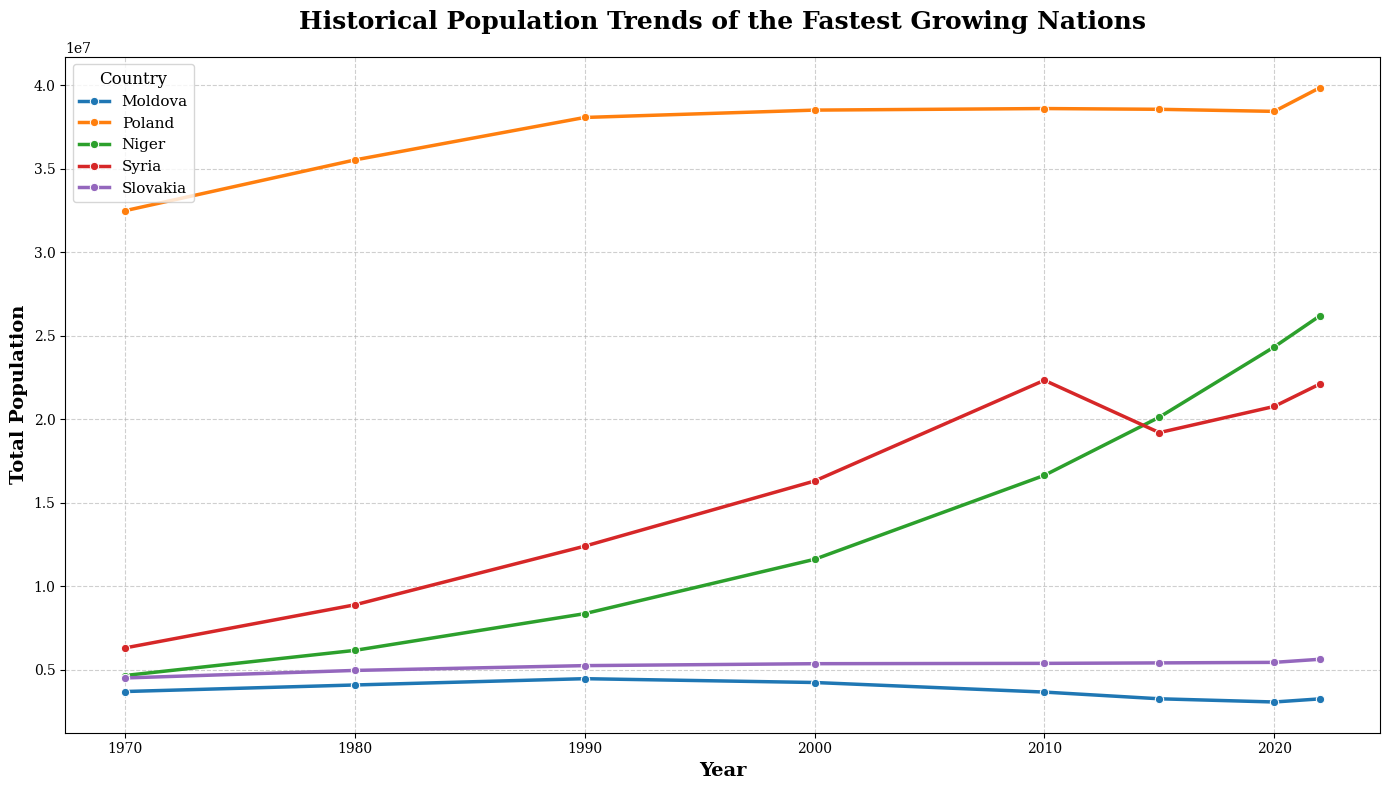

<Figure size 640x480 with 0 Axes>

In [15]:
# Identify Top 5 Countries with the highest Growth Rate
# The 'Growth Rate' column represents the current rate of increase
top_5_growth = df.nlargest(5, 'Growth Rate')

# Prepare data for Time-Series Line Plot
# List the population columns in chronological order
pop_cols = ['1970 Population', '1980 Population', '1990 Population',
            '2000 Population', '2010 Population', '2015 Population',
            '2020 Population', '2022 Population']

# Filter for these 5 countries and select only Name + Population columns
df_trend = top_5_growth[['Country/Territory'] + pop_cols]

# Melt the data from Wide to Long format for Seaborn
df_melted = pd.melt(df_trend,
                    id_vars=['Country/Territory'],
                    value_vars=pop_cols,
                    var_name='Year',
                    value_name='Population')

# Clean the 'Year' column (e.g., '1970 Population' -> 1970)
df_melted['Year'] = df_melted['Year'].str.split().str[0].astype(int)

# Plotting
plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(14, 8))

# Using a lineplot with markers to show specific data points
sns.lineplot(data=df_melted,
             x='Year',
             y='Population',
             hue='Country/Territory',
             marker='o',
             linewidth=2.5)

# Styling
plt.title('Historical Population Trends of the Fastest Growing Nations',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Population', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Enhance Legend
plt.legend(title='Country', title_fontsize=12, fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

#Save the graph
plt.savefig('Historical Population Trends of the Fastest Growing Nations.png', dpi=300, bbox_inches='tight')

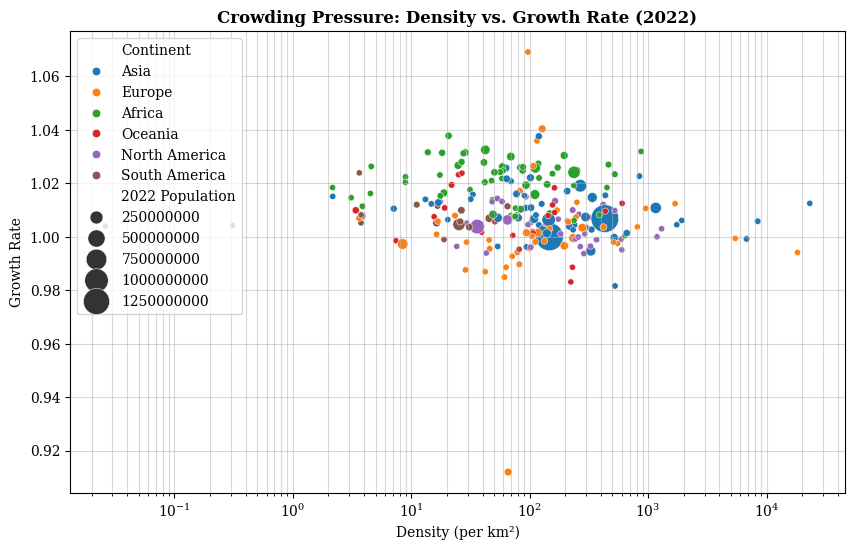

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
# Using a log scale for density because values range from <1 to >20,000
sns.scatterplot(data=df, x='Density (per km²)', y='Growth Rate', hue='Continent', size='2022 Population', sizes=(20, 400))
plt.xscale('log')
plt.title('Crowding Pressure: Density vs. Growth Rate (2022)', fontweight='bold')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

#Save the graph
plt.savefig('Crowding Pressure: Density vs. Growth Rate (2022).png', dpi=300, bbox_inches='tight')

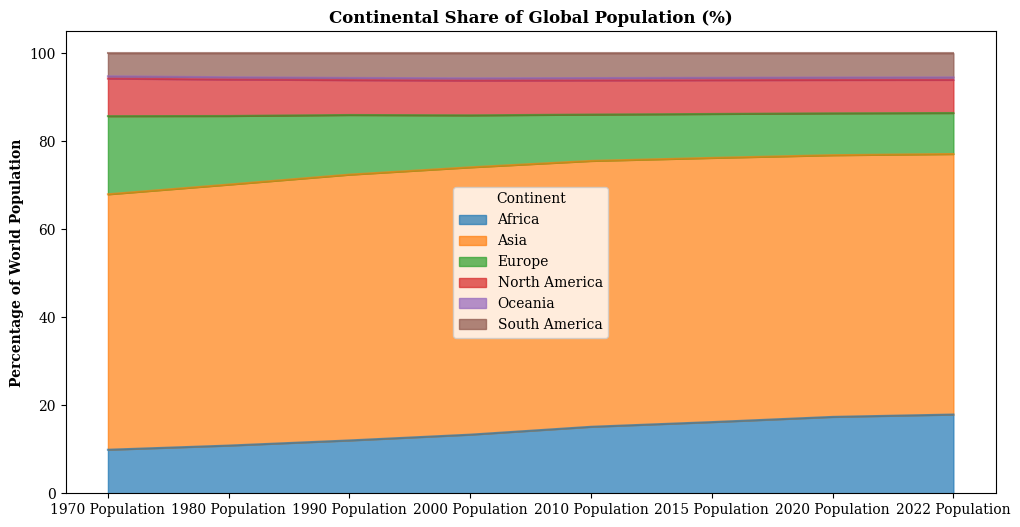

<Figure size 640x480 with 0 Axes>

In [17]:
# Calculate world total per year
world_totals = df[pop_cols].sum()

# Group by continent and divide by world total
continent_share = df.groupby('Continent')[pop_cols].sum().div(world_totals) * 100

continent_share.T.plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.7)
plt.title('Continental Share of Global Population (%)', fontweight='bold')
plt.ylabel('Percentage of World Population', fontweight='bold')
plt.show()

#Save the graph
plt.savefig('Continental Share of Global Population (%).png', dpi=300, bbox_inches='tight')